## SALES PREDICTOR USING MACHINE LEARNING TECHNIQUE

### What is Binary Classification?

Binary classification is a supervised machine learning technique where the objective is to anticipate clear cut class names which are discrete and unoredered, for example, Pass/Fail, Positive/Negative, Default/Not-Default and so forth A couple of certifiable use cases for order are recorded beneath. 

>1. Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.
>2. A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
>3. Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

4. This particular use-case: where the objective is to predict if we can 'WIN' a deal given the historical data

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np


In [3]:
#Readind the data from excel in the form of dataframe
df_train= pd.read_excel('C:/Users/namit/OneDrive/Desktop/Dissertation/DealPrediction/Hubspotfinal2.xlsx', sheet_name = "All deals")

In [4]:
df_train.head(4)

,Deal ID,Last Modified Date,Weighted amount in company currency,Close Date,Deal Type,Number of times contacted,Number of Sales Activities,Forecast amount,Closed Lost Reason,Deal owner,region,Last Activity Date,Owner Assigned Date,Deal Stage,Deal probability,HubSpot Team,Deal Name,Amount,Amount in company currency
0,5.671870e+09,2021-08-13 15:06:00,2500.0,2022-03-08 15:06:00,NaN,NaN,NaN,50000.0,NaN,Alex Toh,Singapore,NaT,2021-07-13 11:49:00,Cold but not lost,0.05,X0PA Sales,RP - Recruiter/VCF,50000.0,50000.0
1,5.493973e+09,2021-06-21 19:51:00,NaN,2022-02-28 19:51:00,NaN,NaN,NaN,NaN,Management has subscribed for a lifetime subsc...,Shashi Kiran Podeti,Singapore,NaT,2021-06-21 19:51:00,Closed Lost,0.00,X0PA Sales,Placement Expert,NaN,NaN
2,5.494041e+09,2021-06-21 19:50:00,NaN,2022-01-31 19:47:00,Platform,1.0,1.0,NaN,NaN,Shashi Kiran Podeti,Singapore,2021-06-04 19:10:00,2021-06-21 19:50:00,Cold but not lost,0.05,X0PA Sales,MM Management Consultant,NaN,NaN
3,5.493994e+09,2021-06-21 19:47:00,NaN,2022-01-31 19:45:00,Platform,NaN,NaN,NaN,NaN,Shashi Kiran Podeti,Singapore,NaT,2021-06-21 19:47:00,No Response,0.10,X0PA Sales,iCan Manpower Consultancy Services,NaN,NaN


In [5]:
df_train.shape

(3765, 19)

In [6]:
df_train.columns

Index(['Deal ID', 'Last Modified Date', 'Weighted amount in company currency',
       'Close Date', 'Deal Type', 'Number of times contacted',
       'Number of Sales Activities', 'Forecast amount', 'Closed Lost Reason',
       'Deal owner', 'region', 'Last Activity Date', 'Owner Assigned Date',
       'Deal Stage', 'Deal probability', 'HubSpot Team', 'Deal Name', 'Amount',
       'Amount in company currency'],
      dtype='object')

C:\Users\namit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


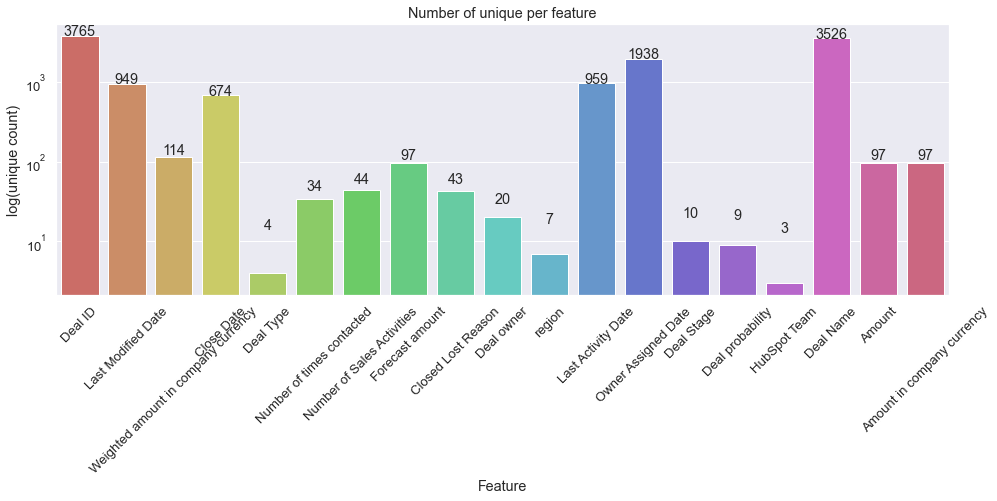

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 5))

cols = df_train.columns

uniques = [len(df_train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

The above graphical representation shows the unique features in the entire dataset

### Data Preprocessing

In [8]:
#Display all the feature/column in the dataset
df_train.columns

Index(['Deal ID', 'Last Modified Date', 'Weighted amount in company currency',
       'Close Date', 'Deal Type', 'Number of times contacted',
       'Number of Sales Activities', 'Forecast amount', 'Closed Lost Reason',
       'Deal owner', 'region', 'Last Activity Date', 'Owner Assigned Date',
       'Deal Stage', 'Deal probability', 'HubSpot Team', 'Deal Name', 'Amount',
       'Amount in company currency'],
      dtype='object')

In [9]:
#Detail description of each feature in the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Deal ID                              3764 non-null   float64       
 1   Last Modified Date                   3764 non-null   datetime64[ns]
 2   Weighted amount in company currency  3570 non-null   float64       
 3   Close Date                           3764 non-null   datetime64[ns]
 4   Deal Type                            441 non-null    object        
 5   Number of times contacted            3118 non-null   float64       
 6   Number of Sales Activities           3118 non-null   float64       
 7   Forecast amount                      3570 non-null   float64       
 8   Closed Lost Reason                   123 non-null    object        
 9   Deal owner                           3764 non-null   object        
 10  region      

In [10]:
is_null = df_train.isnull().sum() / len(df_train) * 100
print("NaN values in train Dataset")
print(is_null[is_null > 0].sort_values(ascending=False))

NaN values in train Dataset
Closed Lost Reason                     96.733068
Deal Type                              88.286853
Last Activity Date                     17.264276
Number of times contacted              17.184595
Number of Sales Activities             17.184595
HubSpot Team                           11.739708
Amount in company currency              5.179283
Weighted amount in company currency     5.179283
Amount                                  5.179283
Forecast amount                         5.179283
region                                  0.053121
Deal probability                        0.026560
Deal Name                               0.026560
Deal ID                                 0.026560
Deal Stage                              0.026560
Owner Assigned Date                     0.026560
Last Modified Date                      0.026560
Close Date                              0.026560
Deal owner                              0.026560
dtype: float64


Important aspect to look into the Null values present in the dataset and if the null values present in any of the features more than 50% need to removed in this data preprocessing step to achieve best out come.

### Exploratory data analysis

Warm Leads                            1611
Interest Confirmed                    1405
Closed Lost                            466
Demo completed awaiting next steps      90
Cold but not lost                       63
Closed Won                              53
Presentation/Demo Scheduled             42
No Response                             20
Looking good                            14
Name: Deal Stage, dtype: int64


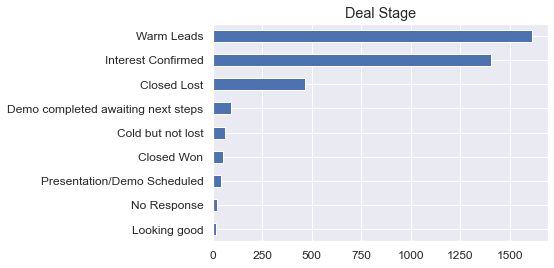

In [11]:
df_train['Deal Stage'].value_counts().sort_values().plot(kind='barh', fontsize = 12, subplots = True)
print(df_train['Deal Stage'].value_counts())

The number of Warm Leads are signficantly high when compared to Closed Won, so it can inferred that though
the company is getting very high Warm Leads yet only around 3% are being converted to Closed Won, 
there might be many reasons for this, for instance lack of followups from the deal owners or high competetion from companies offering similar product or even pricing of the product might be one of them .

### Finding the correlation with respect to the features

In [12]:
set1=df_train[df_train['Deal Stage'] == 'Closed Won']
set2=df_train[df_train['Deal Stage'] == 'Looking good']
set1_result=pd.concat([set1,set2],axis=0)
aa=set1_result[['Weighted amount in company currency','Deal Stage','Forecast amount','Deal owner']]
aa

,Weighted amount in company currency,Deal Stage,Forecast amount,Deal owner
3134,70000.0,Closed Won,70000.0,Alex Toh
3142,37200.0,Closed Won,37200.0,Julian D'Cruz
3251,99.0,Closed Won,99.0,Sid S
3273,43500.0,Closed Won,43500.0,Sid S
3280,2392.0,Closed Won,2392.0,Sid S
...,...,...,...,...
3074,56000.0,Looking good,70000.0,Alex Toh
3110,4000.0,Looking good,5000.0,Srigopal Padhi
3194,8448.0,Looking good,10560.0,Stuti Gupta
3201,6275.2,Looking good,7844.0,Stuti Gupta


In [13]:
aa.tail(10)

,Weighted amount in company currency,Deal Stage,Forecast amount,Deal owner
3024,NaN,Looking good,NaN,Julian D'Cruz
3025,8000.0,Looking good,10000.0,Julian D'Cruz
3030,8000.0,Looking good,10000.0,Srigopal Padhi
3032,168240.0,Looking good,210300.0,Alex Toh
3066,8000.0,Looking good,10000.0,Srigopal Padhi
3074,56000.0,Looking good,70000.0,Alex Toh
3110,4000.0,Looking good,5000.0,Srigopal Padhi
3194,8448.0,Looking good,10560.0,Stuti Gupta
3201,6275.2,Looking good,7844.0,Stuti Gupta
3203,5356.8,Looking good,6696.0,Stuti Gupta


From the above two analysis we can come up with the correlation saying that if 
weighted amount in company currency is equal to the forecast amount/predicted amount then the deal stage achieved will be close won(100%) and if weighted amount in company currency nearer to forecast amount then the deal stage achieved will be looking good. From this we can say that if deal owner able to analyse and predict the proper amount achieveing the closed won state will be higher

In [14]:
addon=aa[aa['Weighted amount in company currency'].values==aa['Forecast amount'].values]['Deal owner'].value_counts()
addon=pd.DataFrame(addon)
addon

,Deal owner
Sid S,32
Nina Alag Suri,6
Paul Membrebe (Deactivated User),4
Raghavendra V (Deactivated User),4
Farida Charania,3
Stuti Gupta,1
Sridhar Balli (Deactivated User),1
Julian D'Cruz,1
Alex Toh,1


Also looking for the deal owner contribution here for the above mentioned two features.
Sid seems to be top performing Deal owner by closing around 32 deals 
which is twice as more than anyone which seems strange, 
it can also be seen that 3 out top 6 Deal Owners have been deactivated, the reason for Stuti Gupta's numbers being so low might because she might be a new joinee, might need more data more conclusion

<AxesSubplot:>

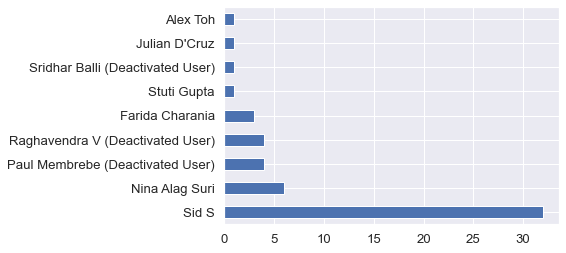

In [15]:
set1=aa[aa['Weighted amount in company currency'].values==aa['Forecast amount'].values]['Deal owner'].value_counts().plot(kind='barh')
set1

Sid S is a Deal owner who was able to match and achieve the above case criteria with 32 closed won.

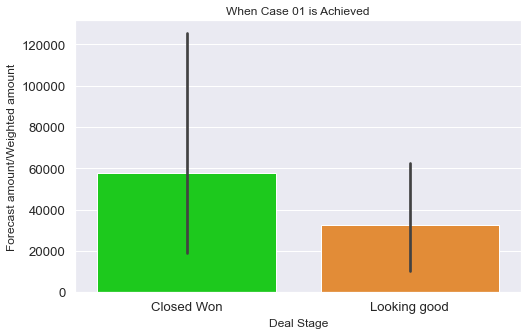

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="Deal Stage", y="Forecast amount", palette=colors, data=aa)
ax.set_title("When Case 01 is Achieved",fontdict= {'size':12})
ax.xaxis.set_label_text("Deal Stage",fontdict= {'size':12})
ax.yaxis.set_label_text("Forecast amount/Weighted amount",fontdict= {'size':12})
plt.show()

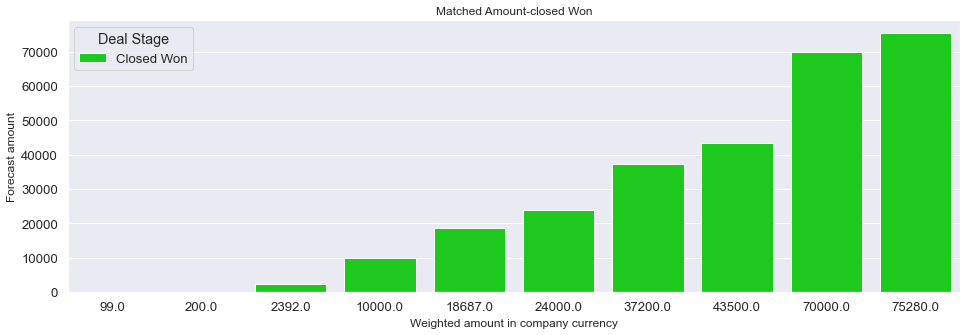

In [17]:
fig, ax = plt.subplots(figsize=(16,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="Weighted amount in company currency", y="Forecast amount",hue="Deal Stage", palette=colors, data=aa.head(10))
ax.set_title("Matched Amount-closed Won",fontdict= {'size':12})
ax.xaxis.set_label_text("Weighted amount in company currency",fontdict= {'size':12})
ax.yaxis.set_label_text("Forecast amount",fontdict= {'size':12})
plt.show()

EDA for features named Weighted amount in company currency Forecast amount if both are equal to one an other closed won is achievable

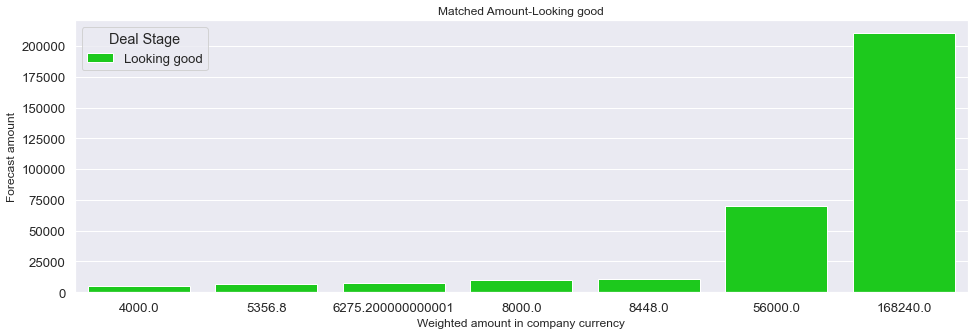

In [18]:
fig, ax = plt.subplots(figsize=(16,5))
colors = ["#00e600"]
sns.barplot(x="Weighted amount in company currency", y="Forecast amount",hue="Deal Stage", palette=colors, data=aa.tail(10))
ax.set_title("Matched Amount-Looking good",fontdict= {'size':12})
ax.xaxis.set_label_text("Weighted amount in company currency",fontdict= {'size':12})
ax.yaxis.set_label_text("Forecast amount",fontdict= {'size':12})
plt.show()

EDA for features named-if Weighted amount in company currency is nearer to Forecast amount then Looking good deal stage is achievable

In [19]:
addon1=df_train[df_train['Deal probability'].values>=0.5]['Deal Stage'].value_counts()
addon1

Closed Won      53
Looking good    14
Name: Deal Stage, dtype: int64

<AxesSubplot:>

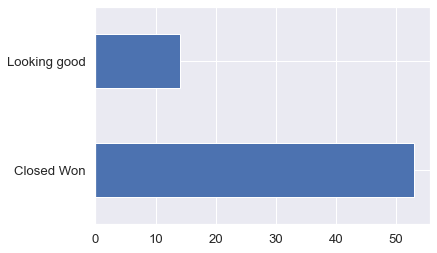

In [20]:
addon1=df_train[df_train['Deal probability'].values>=0.5]['Deal Stage'].value_counts().plot(kind='barh')
addon1

From the above case the correlation with respect to deal probability goes on if Deal probability is more the 0.5 then deal stage of closed won is achieved.
EDA is also shown above.

<AxesSubplot:>

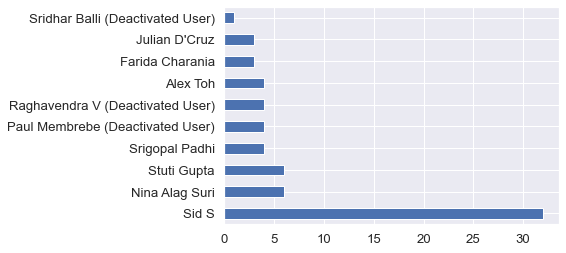

In [21]:
addon1=df_train[df_train['Deal probability'].values>=0.5]['Deal owner'].value_counts().plot(kind='barh')
addon1

Deal owner Sid s is the one who is able to cross the probability more than 0.5 higher the probablity higher the closed won state will be.

<AxesSubplot:>

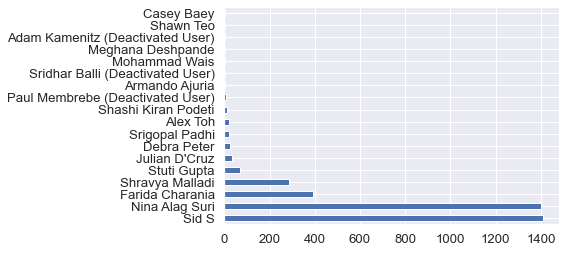

In [22]:
addon1=df_train[df_train['Deal probability'].values<=0.5]['Deal owner'].value_counts().plot(kind='barh')
addon1

Suprising here in the above analysis the Deal owner named Sid is the one who had achieved more deal stage near to closed won and he is the one who is also achieveing <0.5 condition also, If he looks into the problm and solve atleast 10% of it, he will be the one who will achieve huge number of closed won state.

In [23]:
addon1=df_train[df_train['Deal probability'].values>=0.5]['Deal Type'].value_counts()
addon1

Platform            29
Platform partner     1
Managed Services     1
Name: Deal Type, dtype: int64

<AxesSubplot:>

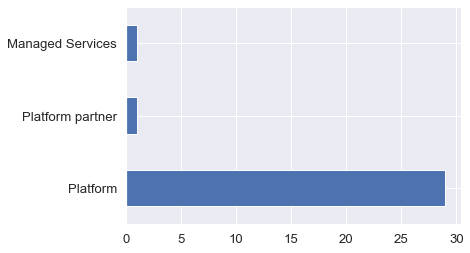

In [24]:
addon1=df_train[df_train['Deal probability'].values>=0.5]['Deal Type'].value_counts().plot(kind='barh')
addon1


Correlation with respect deal type selection,To achieve maximum deal stage to closed won choosing deal type as platform might be one of the reason.majority of the closed won is achieved under platform deal type

In [25]:
df_train.groupby(['Deal owner']).agg(minAmount = ('Amount',np.min), maxAmount = ('Amount',np.max), avgAmount = ('Amount',np.mean)).sort_values("avgAmount",ascending=False)

,minAmount,maxAmount,avgAmount
Deal owner,,,
Alex Toh,4900.0,2000000.0,315604.761905
Stuti Gupta,592.0,1686112.0,54384.500000
Casey Baey,36000.0,36000.0,36000.000000
Armando Ajuria,15000.0,36000.0,30750.000000
Raghavendra V (Deactivated User),2880.0,70000.0,26800.000000
Adam Kamenitz (Deactivated User),25000.0,25000.0,25000.000000
Srigopal Padhi,5000.0,300000.0,21400.000000
Paul Membrebe (Deactivated User),500.0,60000.0,20124.600000
Shravya Malladi,1000.0,330000.0,16105.644599


Suprisingly Alex even with very less number of closed is bring more revenue, 
she/he must have closed some pretty huge deals and Sid even after closing highest
number of deals does'nt even appear to be in the top 5 revenue generating Deal Owner which confirms that Deal Closed count alone cannot used as metric to gauge performance.

                                    minAmount  maxAmount     avgAmount
Deal Stage                                                            
Closed Won                               99.0  1495859.0  57878.851321
Presentation/Demo Scheduled            2500.0  1450000.0  52475.609756
Looking good                           5000.0   210300.0  32646.153846
Demo completed awaiting next steps      500.0   300000.0  28237.500000
Cold but not lost                       500.0   330000.0  25890.000000
Interest Confirmed                     1000.0  2000000.0  16161.657371
Closed Lost                            2000.0   720000.0  15385.307018
Warm Leads                             1000.0  1686112.0  12582.743781
No Response                           10000.0    20000.0  12166.666667


array([<AxesSubplot:title={'center':'avgAmount'}, ylabel='Deal Stage'>],
      dtype=object)

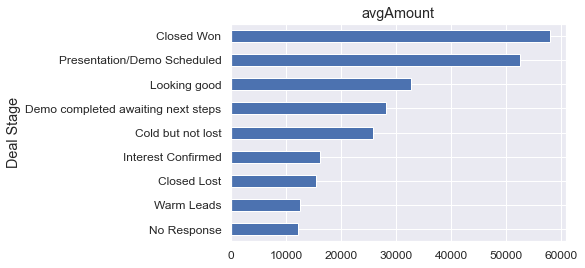

In [26]:
print(df_train.groupby(['Deal Stage']).agg(minAmount = ('Amount',np.min), maxAmount = ('Amount',np.max), avgAmount = ('Amount',np.mean)).sort_values("avgAmount",ascending=False))
df_train.groupby(['Deal Stage']).agg(minAmount = ('Amount',np.min), maxAmount = ('Amount',np.max), avgAmount = ('Amount',np.mean)).sort_values("avgAmount" )["avgAmount"].plot(kind='barh', fontsize = 12, subplots = True)

Though there are only around 50 Closed Won deals it's generating highest amount after Demo Completed stage 
which is not surprising, this also means that Warm Leads though has very high numbers it does seem to generate enough revenue,
there is huge potentential in this space,if the company can manage to convert just 10% of Warm Deals to Closed Won it can exponentially increase the revenue of the company, since Closed Won gets the company a lot revernue

In [27]:
addon1=df_train['region'].value_counts()
addon1

UK           1830
Singapore    1568
India         320
Indonesia      39
Mexico          3
UAE             3
Name: region, dtype: int64

<AxesSubplot:>

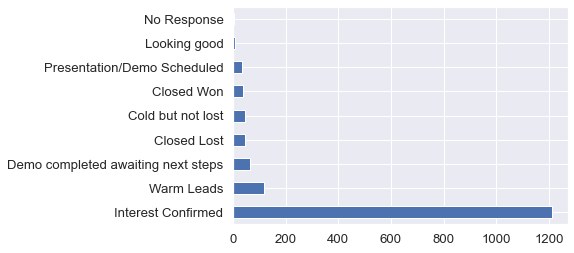

In [28]:
addon1=df_train[df_train['region'].values=="Singapore"]['Deal Stage'].value_counts().plot(kind="barh")
addon1

<AxesSubplot:>

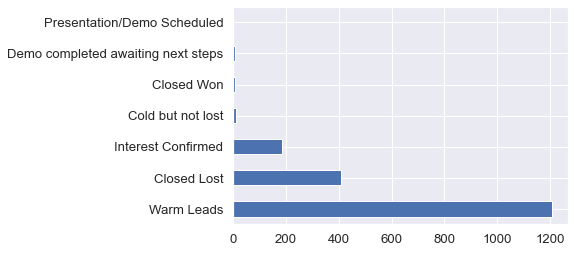

In [29]:
addon1=df_train[df_train['region'].values=="UK"]['Deal Stage'].value_counts().plot(kind="barh")
addon1

From the above analysis we can inferred that region might not be the reason for deal prediction. 

In [30]:
#Readind the data from excel in the form of dataframe
df_train= pd.read_excel('Hubspotfinal2.xlsx', sheet_name = "All deals")

In [31]:
df_train=df_train.drop(['Last Modified Date','Close Date','Last Activity Date','Owner Assigned Date'],axis=1)

In [32]:
df_train

,Deal ID,Weighted amount in company currency,Deal Type,Number of times contacted,Number of Sales Activities,Forecast amount,Closed Lost Reason,Deal owner,region,Deal Stage,Deal probability,HubSpot Team,Deal Name,Amount,Amount in company currency
0,5.671870e+09,2500.0,NaN,NaN,NaN,50000.0,NaN,Alex Toh,Singapore,Cold but not lost,0.05,X0PA Sales,RP - Recruiter/VCF,50000.0,50000.0
1,5.493973e+09,NaN,NaN,NaN,NaN,NaN,Management has subscribed for a lifetime subsc...,Shashi Kiran Podeti,Singapore,Closed Lost,0.00,X0PA Sales,Placement Expert,NaN,NaN
2,5.494041e+09,NaN,Platform,1.0,1.0,NaN,NaN,Shashi Kiran Podeti,Singapore,Cold but not lost,0.05,X0PA Sales,MM Management Consultant,NaN,NaN
3,5.493994e+09,NaN,Platform,NaN,NaN,NaN,NaN,Shashi Kiran Podeti,Singapore,No Response,0.10,X0PA Sales,iCan Manpower Consultancy Services,NaN,NaN
4,5.493866e+09,NaN,Platform,NaN,NaN,NaN,"Not an active requirement now, but will look i...",Shashi Kiran Podeti,Singapore,Cold but not lost,0.05,X0PA Sales,Armour Corporate Services,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,4.766376e+08,0.0,Platform,3.0,4.0,10000.0,NaN,Farida Charania,UK,Closed Lost,0.00,NaN,Vodafone - New Deal,10000.0,10000.0
3761,4.950300e+08,5000.0,Platform,NaN,NaN,5000.0,NaN,Nina Alag Suri,UK,Closed Won,1.00,X0PA Sales,Yuvo- Product integration,5000.0,5000.0
3762,3.870941e+08,5000.0,Platform,1.0,1.0,5000.0,NaN,Nina Alag Suri,UK,Closed Won,1.00,X0PA Sales,Republic Polytechnic,5000.0,5000.0
3763,2.420529e+08,800.0,Platform,0.0,1.0,800.0,NaN,Nina Alag Suri,UK,Closed Won,1.00,X0PA Sales,Ngee Ann Polytechnic,800.0,800.0


### Training Phase

In [33]:
from pycaret import classification
classification_setup = classification.setup(data= df_train, target='Deal Stage')



,Description,Value
0,session_id,8288
1,Target,Deal Stage
2,Target Type,Multiclass
3,Label Encoded,"Closed Lost: 0, Closed Won: 1, Cold but not lost: 2, Demo completed awaiting next steps: 3, Interest Confirmed: 4, Looking good: 5, No Response: 6, Presentation/Demo Scheduled: 7, Warm Leads: 8"
4,Original Data,"(3765, 15)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


Brief Explanation of pycaret parameters
label encoded - Since the machine cannot understand texts the data should be encoded,hence the columns have been encoded by the library

Original Data - Shape of the data (3496 rows, 11 columns)
Missing values - Checks f there are any missing values in the dataset

Numerical featues - Number of numeric feature in the dataset
Categorical features - Number of categorical features in the dataset
Ordinal Features - Number of features of ordinal type where order has importance
High Cardinality Features - Check if there any columns features(columns with values that are very uncommon or unique)
Transformed train set - After data preprocessing like encoding the sahpe of the training set
Transformed test set - After data preprocessing like encoding the sahpe of the test set

Shuffle - If there is any shuffeling done
Stratify - If stratification was used to make sure training set and test set has equal prportion of categorical variables

Numeric imputer - mean(to fill the missing values for datatype number)
PCA - If there was any dimensionality reduction technique like PCA used
Remove Multicollineary - If there was any multicollinearity present between the columns(Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables)
Polynomial Features- None were created(Sometimes the relationship between dependent and independent variables is more complex. Creating new polynomial features sometimes might help in capturing that relationship which otherwise may go unnoticed)
Trignometric Feature - None were created(new features are created based on all trigonometric combinations that exist within the numeric features in a dataset )
Use GPU - Was GPU used

Remove Outliers - No outliers were removed since none were present
Group Features - None were created (When dataset contains features that are related to each other in someway, for example: features recorded at some fixed time intervals, then new statistical features such as mean, median, variance and standard deviation for a group of such features can be created from existing features using group_features)
Fix Imbalance method - In case of imbalance dataset SMOTE method will be used

### Machine learning models usage

Decision tree classfier
>Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
 

In [34]:
#creating the decision tree classfier.
classification_dt1 = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9773,0.9841,0.9088,0.9725,0.9745,0.9657,0.9657
1,0.9886,0.9921,0.9433,0.9875,0.9879,0.9829,0.9829
2,0.9811,0.9893,0.9676,0.9874,0.9835,0.9716,0.9719
3,0.9886,0.9910,0.9167,0.9890,0.9853,0.9828,0.9830
4,0.9886,0.9910,0.9167,0.9889,0.9853,0.9827,0.9829
5,0.9886,0.9910,0.9167,0.9889,0.9853,0.9827,0.9829
6,0.9886,0.9910,0.9333,0.9889,0.9862,0.9827,0.9829
7,0.9848,0.9912,0.9743,0.9880,0.9860,0.9772,0.9773
8,0.9848,0.9880,0.9111,0.9854,0.9799,0.9769,0.9773
9,0.9810,0.9871,0.9310,0.9792,0.9800,0.9713,0.9714


In [35]:
# build and tune the decision tree model
tune_dt1 = classification.tune_model(classification_dt1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9811,0.9970,0.9522,0.9829,0.9819,0.9715,0.9716
1,0.9848,0.9943,0.9155,0.9813,0.9824,0.9771,0.9772
2,0.9848,1.0000,0.9954,0.9924,0.9872,0.9774,0.9777
3,0.9848,0.9968,0.9155,0.9813,0.9824,0.9771,0.9772
4,0.9886,0.9994,0.9167,0.9889,0.9853,0.9827,0.9829
5,0.9886,0.9968,0.9699,0.9901,0.9892,0.9828,0.9828
6,0.9810,0.9993,0.9100,0.9757,0.9771,0.9712,0.9714
7,0.9810,0.9928,0.9310,0.9792,0.9800,0.9713,0.9714
8,0.9810,0.9964,0.9100,0.9757,0.9771,0.9712,0.9714
9,0.9772,0.9935,0.9088,0.9724,0.9745,0.9655,0.9656


In [37]:
from pycaret.classification import *

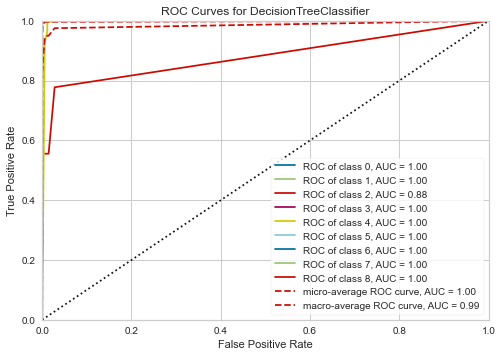

In [38]:
plot_model(tune_dt1, plot = 'auc')

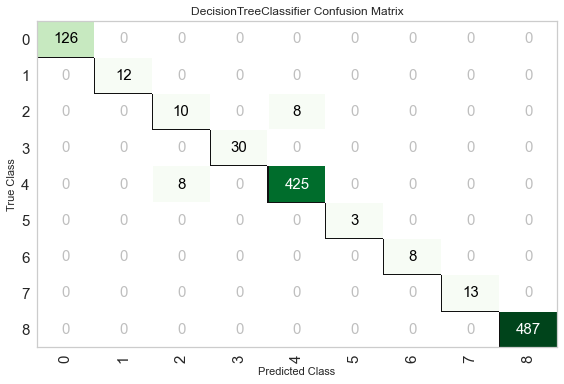

In [41]:
plot_model(tune_dt1, plot = 'confusion_matrix')

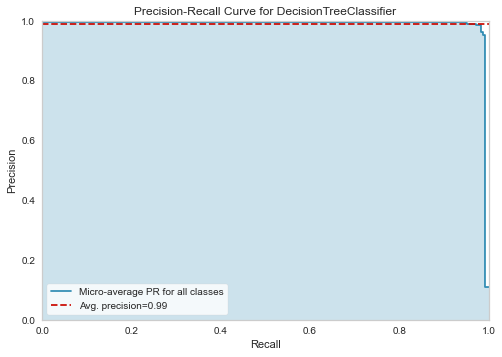

In [42]:
plot_model(tune_dt1, plot = 'pr')

### Linear Regression Model

>linear regression follows the linear mathematical model for determining the value of one dependent variable from value of one given independent variable

In [26]:
classification_dt2 = classification.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3674,0.6072,0.1111,0.1350,0.1975,0.0000,0.0000
1,0.3674,0.5890,0.1111,0.1350,0.1975,0.0000,0.0000
2,0.3712,0.5630,0.1111,0.1378,0.2010,0.0000,0.0000
3,0.3712,0.6031,0.1111,0.1378,0.2010,0.0000,0.0000
4,0.3712,0.6054,0.1111,0.1378,0.2010,0.0000,0.0000
5,0.3726,0.0000,0.1250,0.1388,0.2023,0.0000,0.0000
6,0.3726,0.0000,0.1250,0.1388,0.2023,0.0000,0.0000
7,0.3726,0.0000,0.1250,0.1388,0.2023,0.0000,0.0000
8,0.3688,0.0000,0.1250,0.1360,0.1988,0.0000,0.0000
9,0.3688,0.5854,0.1111,0.1360,0.1988,0.0000,0.0000


In [27]:
# build and tune the decision tree model
tune_dt2 = classification.tune_model(classification_dt2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3674,0.6072,0.1111,0.1350,0.1975,0.0000,0.0000
1,0.3674,0.5890,0.1111,0.1350,0.1975,0.0000,0.0000
2,0.3712,0.5630,0.1111,0.1378,0.2010,0.0000,0.0000
3,0.3712,0.6031,0.1111,0.1378,0.2010,0.0000,0.0000
4,0.3712,0.6054,0.1111,0.1378,0.2010,0.0000,0.0000
5,0.3726,0.0000,0.1250,0.1388,0.2023,0.0000,0.0000
6,0.3726,0.0000,0.1250,0.1388,0.2023,0.0000,0.0000
7,0.3726,0.0000,0.1250,0.1388,0.2023,0.0000,0.0000
8,0.3688,0.0000,0.1250,0.1360,0.1988,0.0000,0.0000
9,0.3688,0.5854,0.1111,0.1360,0.1988,0.0000,0.0000


### k Neighbors Regressor

>The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [28]:
classification_dt3 = classification.create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8106,0.9138,0.3418,0.7850,0.7963,0.7102,0.7113
1,0.8068,0.9194,0.3813,0.7923,0.7974,0.7019,0.7023
2,0.8258,0.9301,0.3335,0.7990,0.8112,0.7317,0.7332
3,0.8220,0.9250,0.3920,0.8218,0.8198,0.7321,0.7332
4,0.8409,0.9452,0.3905,0.8377,0.8383,0.7591,0.7596
5,0.8213,0.0000,0.3850,0.8097,0.8133,0.7237,0.7241
6,0.7909,0.0000,0.3752,0.7857,0.7844,0.6785,0.6789
7,0.8289,0.0000,0.4289,0.8175,0.8231,0.7365,0.7366
8,0.7871,0.0000,0.5138,0.7765,0.7793,0.6768,0.6779
9,0.8479,0.9320,0.3712,0.8317,0.8366,0.7657,0.7673


In [29]:
# build and tune the decision tree model
tune_dt3 = classification.tune_model(classification_dt3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9489,0.3227,0.8153,0.8199,0.7441,0.7449
1,0.8447,0.9355,0.5275,0.8345,0.8391,0.7630,0.7632
2,0.8523,0.9479,0.4442,0.8381,0.8419,0.7723,0.7737
3,0.8295,0.9444,0.3340,0.8317,0.8294,0.7417,0.7420
4,0.8712,0.9650,0.4016,0.8631,0.8607,0.8025,0.8036
5,0.8327,0.0000,0.3782,0.8120,0.8181,0.7397,0.7405
6,0.8099,0.0000,0.3291,0.7956,0.8019,0.7057,0.7060
7,0.8327,0.0000,0.3426,0.8121,0.8209,0.7380,0.7392
8,0.8175,0.0000,0.4802,0.8078,0.8104,0.7223,0.7230
9,0.8555,0.9470,0.3939,0.8425,0.8462,0.7779,0.7788


Accuracy for all the above used models the best model with 0.97 accuracy we shall proceed with this algorithm for testing.

### Testing/evalution

In [38]:
predict_model(tune_dt1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9734,0.9977,0.7778,0.9501,0.9611,0.9599,0.9606


,Deal ID,Weighted amount in company currency,Number of times contacted,Number of Sales Activities,Deal probability,Deal Type_Managed Services,Deal Type_Platform,Deal Type_Platform partner,Deal Type_not_available,Closed Lost Reason_Client has different priorities and decided to build inhouse,...,Deal Name_trustlink-sg.com Platform Sales,Deal Name_utilitywise Platform Sales,Deal Name_valconusa.co.in - New Deal,Deal Name_viantcommodities - New Deal,Deal Name_visur.one - Mini ATS,Deal Name_we CONECT Global Leaders GmbH visited the site,Deal Name_аква лайф visited the site,Deal Stage,Label,Score
0,5.004948e+09,500.0000,0.801638,1.846224,0.05,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4,0.7347
1,5.673371e+09,3532.1604,0.000000,1.000000,0.05,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0.9977
2,1.906672e+09,3000.0000,0.000000,1.000000,0.30,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,1.0000
3,1.947295e+09,3000.0000,0.000000,1.000000,0.30,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,1.0000
4,5.512272e+09,8000.0000,18.000000,18.000000,0.80,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,0.8571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1.054379e+09,3000.0000,0.000000,1.000000,0.30,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,1.0000
1125,1.980293e+09,3000.0000,0.000000,1.000000,0.30,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8,1.0000
1126,8.810659e+08,0.0000,1.000000,1.000000,0.00,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
1127,2.639860e+09,500.0000,0.000000,1.000000,0.05,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0.9977


Based the best trained model usage the result can be seen in the above frame with last two labels namely Label and score for deal stage as there is categorical features(numerical format)of deal stage will be matched with predicted label along with the score. 